<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/LR/model8b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model 8b - Used only for Feb
Predictors: day_of_week, max, snow_ice_pellets

In [1]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

def flat_list(nested_list):
  return [value for sublist in nested_list for value in sublist]

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/LR/CC_Normalised_Per_Year/LR8b.csv')

In [3]:
randomised = data.iloc[np.random.permutation(len(data))]

In [4]:
predictors = randomised.iloc[:,0:3]
targets = randomised.iloc[:,3]
train_size = int(len(randomised)*0.8)
qty_predictors = 3
qty_targets = 1

In [5]:
# Design model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(qty_targets, input_shape=[qty_predictors]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [6]:
# View model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train model
history = model.fit(predictors.iloc[0:train_size], targets.iloc[0:train_size], epochs=250)

Epoch 1/250
4/4 [==============================] - 1s 8ms/step - loss: 422.3899
Epoch 2/250
4/4 [==============================] - 0s 6ms/step - loss: 350.8533
Epoch 3/250
4/4 [==============================] - 0s 4ms/step - loss: 288.3654
Epoch 4/250
4/4 [==============================] - 0s 3ms/step - loss: 230.8183
Epoch 5/250
4/4 [==============================] - 0s 11ms/step - loss: 181.9894
Epoch 6/250
4/4 [==============================] - 0s 3ms/step - loss: 139.5862
Epoch 7/250
4/4 [==============================] - 0s 5ms/step - loss: 105.8050
Epoch 8/250
4/4 [==============================] - 0s 4ms/step - loss: 78.9399
Epoch 9/250
4/4 [==============================] - 0s 5ms/step - loss: 59.1083
Epoch 10/250
4/4 [==============================] - 0s 6ms/step - loss: 44.7754
Epoch 11/250
4/4 [==============================] - 0s 8ms/step - loss: 34.1555
Epoch 12/250
4/4 [==============================] - 0s 6ms/step - loss: 27.1090
Epoch 13/250
4/4 [=======================

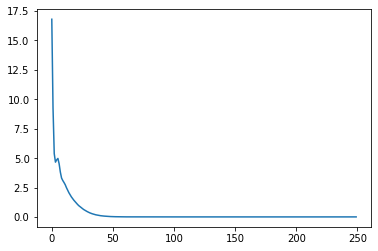

In [ ]:
# View training history
plt.plot(history.history['loss'])

In [8]:
# Test model
model_test = flat_list(model.predict(predictors.iloc[train_size:]))

In [9]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((targets[train_size:].values - model_test)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(data['crime_count'][:train_size])

rmse = np.sqrt(np.mean((targets[train_size:].values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.1585269391867851
Using the training data mean of 0.2734475956034159 would have has resulted in a RMSE of 0.13417315861172818
